# Walmart Customer Analysis

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# Data Preprecoessing

In [2]:
data = pd.read_csv('walmart.csv')
data = data.groupby('User_ID').agg({'Gender': 'first', 'Age': 'first', 'Occupation': 'first', 'City_Category': 'first', 'Stay_In_Current_City_Years': 'first', 'Marital_Status': 'first', 'Purchase': 'sum'}).reset_index()

In [3]:
data

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,334093
1,1000002,M,55+,16,C,4,0,810472
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,206468
4,1000005,M,26-35,20,A,1,1,821001
...,...,...,...,...,...,...,...,...
5886,1006036,F,26-35,15,B,4,1,4116058
5887,1006037,F,46-50,1,C,4,0,1119538
5888,1006038,F,55+,1,C,2,0,90034
5889,1006039,F,46-50,0,B,4,1,590319


In [4]:
map_dict = {'M': 1, 'F': 0}
data['Gender'] = data['Gender'].map(map_dict)

In [5]:
map_dict2 = {'A': 1, 'B': 2, 'C': 3}
data['City_Category'] = data['City_Category'].map(map_dict2)

In [6]:
map_dict3 = {'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7}
data['Age'] = data['Age'].map(map_dict3)

In [7]:
sc = StandardScaler()
data = sc.fit_transform(data)

In [8]:
pca = PCA(n_components = 2)
data = pca.fit_transform(data)

# Finding optimal number of clusters

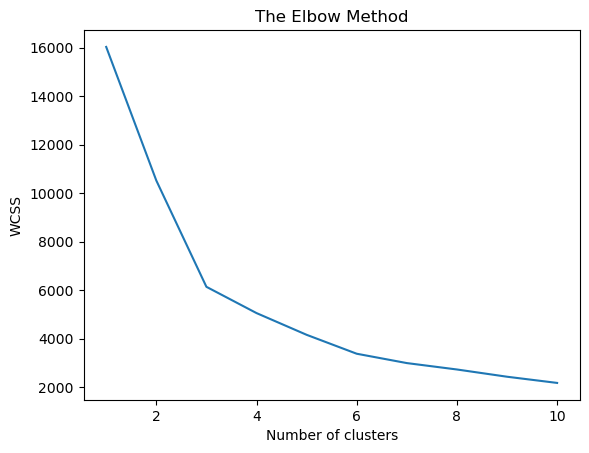

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Performing Clustering

In [10]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(data)

# Visualizing the Clusters

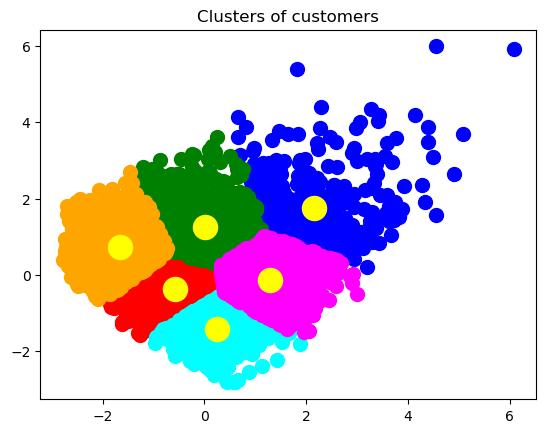

In [11]:
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(data[y_kmeans == 5, 0], data[y_kmeans == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.show()